## Build and display cme open interest history from ftp.cmegroup.com daily xlsx files

(This workbook executes several Bash commands, so the workbook will not work using Windows)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import numpy as np
import os,sys
pypg_path = os.path.abspath('../../pypg')
if pypg_path not in sys.path:
    sys.path.append(pypg_path)
import pypg.pg_pandas as pg
import openpyxl as pyxl
import re
import matplotlib.pyplot as plt
import datetime
from openpyxl import load_workbook
ftp_folder = 'ftp://ftp.cmegroup.com/daily_volume'
temp_folder = './temp_folder'
local_folder = f'{temp_folder}/cme_daily_volume'
cme_csv_save_folder = './cme_oi_data'
EXAMPLE_COMMODITY_ETFS = ['GLD','SLV','USO']
REFRESH_ETF_PRICES = True

try:
    os.mkdir(cme_csv_save_folder)
except:
    pass


___
## Fetch daily_volume.xlsx files from ftp site using wget.
#### ONLY FETCH FOR A SPECIFIC YEAR
___

In [3]:
year_offset = 0
if datetime.datetime.now() < datetime.datetime(2020,1,10):
    year_offset = 1

year = str(datetime.datetime.now().year  - year_offset)
csv_fn = f'{temp_folder}/cme_open_interest_%s' %(str(year))

if not os.path.isfile(csv_fn):
    print(f"We will fetch the csv file {csv_fn}.csv")
else:
    print(f"We will NOT fetch the csv file {csv_fn}.csv")


We will fetch the csv file ./temp_folder/cme_open_interest_2020.csv


In [4]:
year_offset

0

In [5]:
# !wget -P {local_folder}  {ftp_folder}/{file_name}
# year = '2019'
year = str(datetime.datetime.now().year - year_offset)

csv_fn = f'{temp_folder}/cme_open_interest_%s' %(str(year))
# fetch the data if the below is True
if not os.path.isfile(csv_fn):
    !wget -r -l1 --no-parent  -P {local_folder} -A "daily_volume_{year}*.xlsx" ftp://ftp.cmegroup.com/daily_volume/
    !mv {local_folder}/ftp.cmegroup.com/daily_volume/*.xlsx {local_folder}
    

--2020-04-06 08:29:52--  ftp://ftp.cmegroup.com/daily_volume/
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/.listing'
Resolving ftp.cmegroup.com... 52.7.201.185
Connecting to ftp.cmegroup.com|52.7.201.185|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /daily_volume ... done.
==> PASV ... done.    ==> LIST ... done.

ftp.cmegroup.com/da     [                <=>   ] 129.70K  17.4KB/s   in 5.9s   

2020-04-06 08:30:15 (22.1 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/.listing' saved [132810]

Removed './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/.listing'.
Rejecting 'daily_volume.xlsx'.
Rejecting 'daily_volume_20140102.xlsx'.
Rejecting 'daily_volume_20140103.xlsx'.
Rejecting 'daily_volume_20140106.xlsx'.
Rejecting 'daily_volume_20140107.xlsx'.
Rejecting 'daily_volume_20140108.xlsx'.
Rejecting 'daily_volume_20140109.xlsx'.
Rejecting 'da

Rejecting 'daily_volume_20150617.xlsx'.
Rejecting 'daily_volume_20150618.xlsx'.
Rejecting 'daily_volume_20150619.xlsx'.
Rejecting 'daily_volume_20150622.xlsx'.
Rejecting 'daily_volume_20150623.xlsx'.
Rejecting 'daily_volume_20150624.xlsx'.
Rejecting 'daily_volume_20150625.xlsx'.
Rejecting 'daily_volume_20150626.xlsx'.
Rejecting 'daily_volume_20150629.xlsx'.
Rejecting 'daily_volume_20150630.xlsx'.
Rejecting 'daily_volume_20150701.xlsx'.
Rejecting 'daily_volume_20150702.xlsx'.
Rejecting 'daily_volume_20150706.xlsx'.
Rejecting 'daily_volume_20150707.xlsx'.
Rejecting 'daily_volume_20150708.xlsx'.
Rejecting 'daily_volume_20150709.xlsx'.
Rejecting 'daily_volume_20150710.xlsx'.
Rejecting 'daily_volume_20150713.xlsx'.
Rejecting 'daily_volume_20150714.xlsx'.
Rejecting 'daily_volume_20150715.xlsx'.
Rejecting 'daily_volume_20150716.xlsx'.
Rejecting 'daily_volume_20150717.xlsx'.
Rejecting 'daily_volume_20150720.xlsx'.
Rejecting 'daily_volume_20150721.xlsx'.
Rejecting 'daily_volume_20150722.xlsx'.


==> PASV ... done.    ==> RETR daily_volume_20200102.xlsx ... done.
Length: 62198 (61K)

ftp.cmegroup.com/da 100%[=====================>]  60.74K   242KB/s   in 0.3s   

2020-04-06 08:30:15 (242 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200102.xlsx' saved [62198]

--2020-04-06 08:30:15--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20200103.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200103.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20200103.xlsx ... done.
Length: 64113 (63K)

ftp.cmegroup.com/da 100%[=====================>]  62.61K   191KB/s   in 0.3s   

2020-04-06 08:30:16 (191 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200103.xlsx' saved [64113]

--2020-04-06 08:30:16--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20200106.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20200127.xlsx ... done.
Length: 66175 (65K)

ftp.cmegroup.com/da 100%[=====================>]  64.62K   225KB/s   in 0.3s   

2020-04-06 08:30:22 (225 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200127.xlsx' saved [66175]

--2020-04-06 08:30:22--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20200128.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200128.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20200128.xlsx ... done.
Length: 65667 (64K)

ftp.cmegroup.com/da 100%[=====================>]  64.13K   247KB/s   in 0.3s   

2020-04-06 08:30:23 (247 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200128.xlsx' saved [65667]

--2020-04-06 08:30:23--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20200129.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20200219.xlsx ... done.
Length: 65451 (64K)

ftp.cmegroup.com/da 100%[=====================>]  63.92K   416KB/s   in 0.2s   

2020-04-06 08:30:33 (416 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200219.xlsx' saved [65451]

--2020-04-06 08:30:33--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20200220.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200220.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20200220.xlsx ... done.
Length: 66292 (65K)

ftp.cmegroup.com/da 100%[=====================>]  64.74K  --.-KB/s   in 0.1s   

2020-04-06 08:30:33 (518 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200220.xlsx' saved [66292]

--2020-04-06 08:30:33--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20200221.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20200312.xlsx ... done.
Length: 65089 (64K)

ftp.cmegroup.com/da 100%[=====================>]  63.56K   279KB/s   in 0.2s   

2020-04-06 08:30:37 (279 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200312.xlsx' saved [65089]

--2020-04-06 08:30:37--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20200313.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200313.xlsx'
==> CWD not required.
==> PASV ... done.    ==> RETR daily_volume_20200313.xlsx ... done.
Length: 63771 (62K)

ftp.cmegroup.com/da 100%[=====================>]  62.28K   321KB/s   in 0.2s   

2020-04-06 08:30:37 (321 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200313.xlsx' saved [63771]

--2020-04-06 08:30:37--  ftp://ftp.cmegroup.com/daily_volume/daily_volume_20200316.xlsx
           => './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_

==> PASV ... done.    ==> RETR daily_volume_20200403.xlsx ... done.
Length: 63301 (62K)

ftp.cmegroup.com/da 100%[=====================>]  61.82K  --.-KB/s   in 0.1s   

2020-04-06 08:30:41 (460 KB/s) - './temp_folder/cme_daily_volume/ftp.cmegroup.com/daily_volume/daily_volume_20200403.xlsx' saved [63301]

FINISHED --2020-04-06 08:30:41--
Total wall clock time: 49s
Downloaded: 65 files, 4.0M in 20s (209 KB/s)


___
### Extract the open interest data from the xlsx workbook, and save it in csv files named "cme_open_interest_yyyy.csv" where yyyy is like 2019.

* This takes a long time, so don't rerun it if you have already created a DataFrame for the year
___

In [6]:
if not os.path.isfile(csv_fn):

    # get all of the xlsx files
    file_names = os.listdir(local_folder)

    # Create a place holder for the final DataFrame
    df_all_col_data = None

    # valid files have 'daily_volume' in the name, 
    for fn in file_names:
        if 'daily_volume' not in fn:
            continue
        # and valid files have the year that we are currently working on in the name as well
        if year not in fn:
            continue

        # If you get here, you will process the xlsx or xls file
        full_path = f'{local_folder}/{fn}'
        if len(re.findall('.xls$',full_path)) > 0:
            # if the file is an xls file, convert it to xlsx using libreoffice
            !/Applications/LibreOffice.app/Contents/MacOS/soffice --convert-to xlsx {full_path} --headless --outdir {local_folder} 
            full_path = full_path + "x"

        print(f'processing {full_path} ')

        # Get a workbook
        wb = load_workbook(filename = full_path)
        # Get a worksheet
        sheet_ranges = wb['CME Group Vol and OI by Product']
        # find Header column by finding Description
        first_row = None
        for i in range(1,20):
            cell_val = sheet_ranges[f'A{str(i)}'].value
            if 'description' in str(cell_val).lower():
                first_row = str(i)
                break
        if first_row is None:
            print('ERROR: cannot find header column')
            break

        # Get the column names, and get rid of non-alphabetic characters
        data = sheet_ranges[f'A{first_row}:L1000']
        cols = ['_'.join(re.findall('[A-Za-z ]{1,}',str(data[0][i].value))) for i in range(12)]
        cols = [c.strip().replace(' ','_').replace('__','_') for c in cols]

        # Populate col_data, which has all of the data for each column
        col_data = []
        for j in range(12):
            this_col = []
            for i in range(1,len(data)):
                try:
                    this_col.append(data[i][j].value)
                except:
                    this_col.append(None)
            col_data.append(this_col)

        # Create the dictionary of column names and data for creating the DataFrame
        dict_for_df = {cols[i]:col_data[i] for i in range(12)}

        # Create the DataFrame
        df_col_data = pd.DataFrame(dict_for_df) 

        # Add a trade_date field
        df_col_data['trade_date'] = int(re.findall('20[0-9]{2}[0-1][0-9][0-3][0-9]',fn)[0])

        # populate df_all_col_data, which is the dataframe that holds all of the open interest data for each day
        if df_all_col_data is None:
            df_all_col_data = df_col_data.copy()
        else:
            df_all_col_data = df_all_col_data.append(df_col_data)
            
    # Save df_all_col_data and save a version just for CL
    df_all_col_data.to_csv(f'{cme_csv_save_folder}/cme_open_interest_{year}.csv',index=False)
#     df_all_col_data[df_all_col_data.Commodity_Indicator=='CL'].to_csv(f'{temp_folder}/cl_open_interest_{year}.csv',index=False)
            

processing ./temp_folder/cme_daily_volume/daily_volume_20200102.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200103.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200106.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200107.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200108.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200109.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200110.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200113.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200114.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200115.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200116.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200117.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200121.xlsx 
processing ./temp_folder/cme_daily_volume/daily_volume_20200122.xlsx 
processing ./temp_fo

___
### Create the df_commodity_all_years DataFrame 
#### This DataFrame has Commodity open interest data for multiple years, for a specific commodity.
___

In [7]:
commodity = 'GC'
csv_name_template = f'{cme_csv_save_folder}/cme_open_interest_%s.csv'
df_commodity_all_years = None
years = [2013,2014,2015,2016,2017,2018,2019,2020]
for y in years:
    n = csv_name_template %(str(y))
    df_temp = pd.read_csv(n)
    df_temp = df_temp[df_temp.Commodity_Indicator==commodity]
    if df_commodity_all_years is None:
        df_commodity_all_years = df_temp.copy()
    else:
        df_commodity_all_years = df_commodity_all_years.append(df_temp)

# make sure it's sorted
df_commodity_all_years_sorted = df_commodity_all_years.sort_values(by='trade_date')
df_commodity_all_years_sorted.index = range(len(df_commodity_all_years_sorted))

In [8]:
df_commodity_all_years_sorted[df_commodity_all_years_sorted.Product_Description=='GOLD FUTURES'].trade_date.unique()

array([20130102, 20130103, 20130104, ..., 20200401, 20200402, 20200403])

___
### Create a method that Plots Commodity open interest, and selected ETF
___

In [9]:
def plot_open_interest(df_in,num_of_x_ticks=20):
    df_cl = df_in[['trade_date','Open_Interest','etf']]
    df_cl = df_cl[~df_cl.Open_Interest.isnull()]
    df_cl.Open_Interest = df_cl.Open_Interest.astype(float).astype(int)
    
    df_cl = df_cl.drop_duplicates()
    xs = list(df_cl.trade_date)
    df_cl['trade_date'] = df_cl.trade_date.apply(lambda i:str(i))

    x = list(range(len(df_cl)))
    n = len(x)
    s = num_of_x_ticks
    k = n//s*s
    x_indices = x[::-1][:k][::k//s][::-1]
    x_labels = [str(t) for t in list(df_cl.iloc[x_indices].trade_date)]
    y = list(df_cl.Open_Interest)[x_indices[0]:]
    y2 = list(df_cl['etf'])[x_indices[0]:]
    x = x[x_indices[0]:]
    fig, ax = plt.subplots(1,1,figsize=(10,8))
    ax.grid(color='lightgray', alpha=0.7)

    ax.plot(x,y,'b-')
    ax.set_ylabel("Open Interest")
    ax.tick_params('y', colors='b')
    plt.xticks(x_indices, x_labels, rotation='vertical')
    plt.subplots_adjust(bottom=0.20)
    plt.xticks(rotation=60)

    ax2 = ax.twinx()
    ax2.plot(x,y2,'r-',)
    ax2.set_title("ETF NAV vs Open Interest")
    ax2.set_ylabel("ETF NAV")    
    ax2.tick_params('y', colors='r')

    plt.show()


In [10]:
if REFRESH_ETF_PRICES:
    for commod in EXAMPLE_COMMODITY_ETFS:
        dfe = web.DataReader(commod, 'yahoo', dt.datetime(2016, 1, 1), dt.datetime.now())
        dfe['Date'] = dfe.index
        dfe.index  = list(range(len(dfe)))
        dfe['trade_date'] = dfe.Date.apply(lambda s:int(str(s)[0:4]+str(s)[5:7]+str(s)[8:10]))
        dfe = dfe[['Date','Open','High','Low','Close','Adj Close','Volume','trade_date']]
        dfe.to_csv(f'{commod}_daily.csv',index=False)

### Execute the plot

In [11]:
etf_path = 'gld_daily.csv'
df_etf_daily = pd.read_csv(etf_path)
df_etf_daily = df_etf_daily.drop_duplicates()
df_etf_daily['trade_date'] = df_etf_daily.Date.apply(lambda s: int(s[0:4]+s[5:7]+s[8:10]))
df_etf_daily2 = df_etf_daily.sort_values(by='trade_date')
df_etf_daily3 = df_etf_daily2[['trade_date','Adj Close']].rename(columns={'Adj Close':'etf'})
df_commodity_all_years_with_etf = df_commodity_all_years_sorted.merge(df_etf_daily3,how='inner',on='trade_date')
df_commodity_all_years_with_etf.trade_date = df_commodity_all_years_with_etf.trade_date.astype(int)
df_commodity_all_years_with_etf = df_commodity_all_years_with_etf.drop_duplicates()

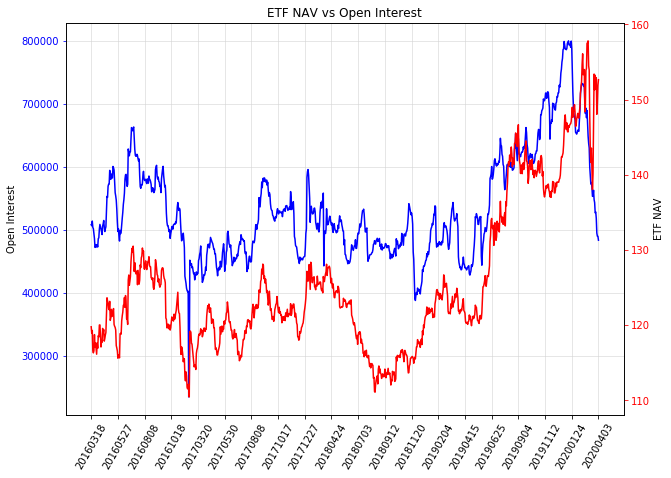

In [12]:
plot_open_interest(df_commodity_all_years_with_etf)

### Execute a zoomed in version

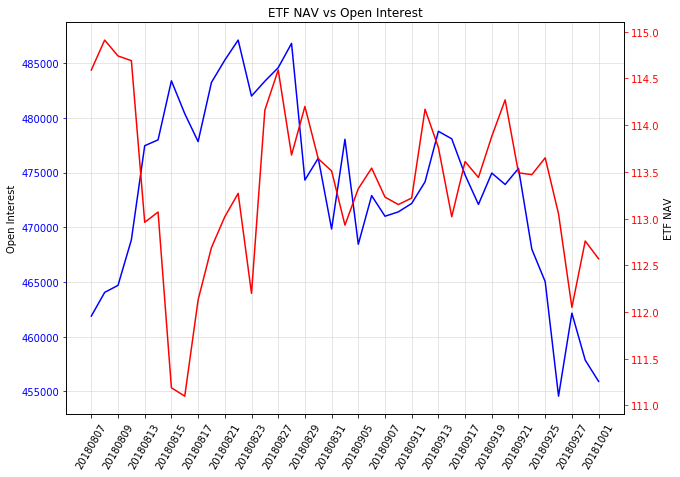

In [13]:
beg_yyyymmdd = 20180801
end_yyyymmdd = 20181001
c1= df_commodity_all_years_with_etf.trade_date>=beg_yyyymmdd
c2 = df_commodity_all_years_with_etf.trade_date<=end_yyyymmdd
c_all = (c1 & c2)
df_sub = df_commodity_all_years_with_etf[c_all][[
    'trade_date','Open_Interest','etf']].drop_duplicates()
plot_open_interest(df_sub)

In [14]:
dfff = pd.read_csv(f'{cme_csv_save_folder}/cme_open_interest_{year}.csv')

## End

In [15]:
[y for y in dfff[dfff.Product_Description == 'GOLD FUTURES'].trade_date.unique() if int(str(y)[0:4])>=2019]

[20200102,
 20200103,
 20200106,
 20200107,
 20200108,
 20200109,
 20200110,
 20200113,
 20200114,
 20200115,
 20200116,
 20200117,
 20200121,
 20200122,
 20200123,
 20200124,
 20200127,
 20200128,
 20200129,
 20200130,
 20200131,
 20200203,
 20200204,
 20200205,
 20200206,
 20200207,
 20200210,
 20200211,
 20200212,
 20200213,
 20200214,
 20200218,
 20200219,
 20200220,
 20200221,
 20200224,
 20200225,
 20200226,
 20200227,
 20200228,
 20200302,
 20200303,
 20200304,
 20200305,
 20200306,
 20200309,
 20200310,
 20200311,
 20200312,
 20200313,
 20200316,
 20200317,
 20200318,
 20200319,
 20200320,
 20200323,
 20200324,
 20200325,
 20200326,
 20200327,
 20200330,
 20200331,
 20200401,
 20200402,
 20200403]